In [1]:
import random
import textwrap
import datetime as dt
import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly.offline as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', low_memory=False, usecols=['iyear', 'imonth', 'iday', 'country_txt', 'city', 
                                                                              'longitude', 'latitude', 'nkill', 'nwound', 
                                                                              'summary', 'target1', 'gname', 'attacktype1_txt', 'region_txt'])
df.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'city':'city', 'longitude':'longitude', 
                   'latitude':'latitude', 'nkill':'killed', 'nwound':'wounded', 'summary':'summary', 'target1':'target', 
                   'gname':'group_name', 'attacktype1_txt':'attack_type', 'region_txt':'region'}, inplace=True)

In [4]:
df.head()

,year,month,day,country,region,city,latitude,longitude,summary,attack_type,target,group_name,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Julio Guzman,MANO-D,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,Assassination,Employee,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,NaN,Bombing/Explosion,U.S. Embassy,Unknown,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,U.S. Consulate,Unknown,NaN,NaN


In [5]:
# removing rows with month=0
df = df[df['month']!=0]

In [6]:
df.day.unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
      dtype=int64)

In [7]:
# removing rows with day = 0
df = df[df.day!=0]

In [8]:
df['date'] = [dt.datetime(y,m,d) for y, m, d in zip(df['year'], df['month'], df['day'])]

In [9]:
df.head()

,year,month,day,country,region,city,latitude,longitude,summary,attack_type,target,group_name,killed,wounded,date
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Julio Guzman,MANO-D,1.0,0.0,1970-07-02
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,1/1/1970: Unknown African American assailants ...,Armed Assault,Cairo Police Headquarters,Black Nationalists,0.0,0.0,1970-01-01
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,NaN,Assassination,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),0.0,0.0,1970-01-02
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,1/2/1970: Unknown perpetrators detonated explo...,Bombing/Explosion,Edes Substation,Unknown,0.0,0.0,1970-01-02
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,0.0,0.0,1970-01-02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180800 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   year         180800 non-null  int64         
 1   month        180800 non-null  int64         
 2   day          180800 non-null  int64         
 3   country      180800 non-null  object        
 4   region       180800 non-null  object        
 5   city         180369 non-null  object        
 6   latitude     176331 non-null  float64       
 7   longitude    176330 non-null  float64       
 8   summary      115272 non-null  object        
 9   attack_type  180800 non-null  object        
 10  target       180169 non-null  object        
 11  group_name   180800 non-null  object        
 12  killed       170649 non-null  float64       
 13  wounded      164672 non-null  float64       
 14  date         180800 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), 

In [11]:
df.isnull().sum()

year               0
month              0
day                0
country            0
region             0
city             431
latitude        4469
longitude       4470
summary        65528
attack_type        0
target           631
group_name         0
killed         10151
wounded        16128
date               0
dtype: int64

In [12]:
df['wounded'] = df['wounded'].fillna(0).astype(int)
df['killed'] = df['killed'].fillna(0).astype(int)

In [13]:
df['casualities'] = df.killed + df.wounded

### Univariate Analysis

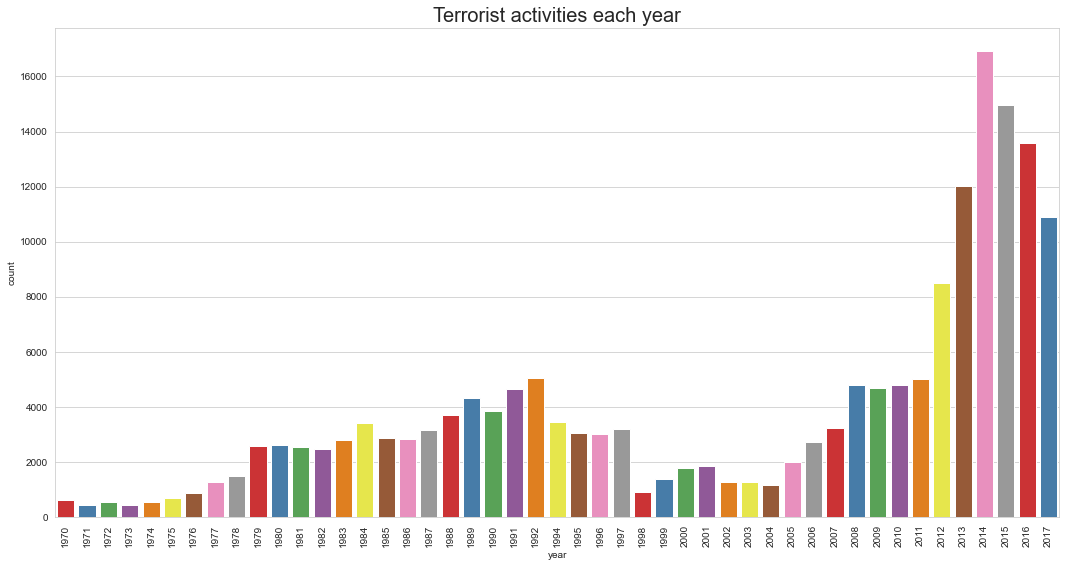

In [14]:
plt.figure(figsize=(18,9))
sns.countplot(x='year', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Terrorist activities each year', size=20)
plt.show()

Looks like after 2011 terrorist activities increased and 2014 is the year with most terrorists attack.

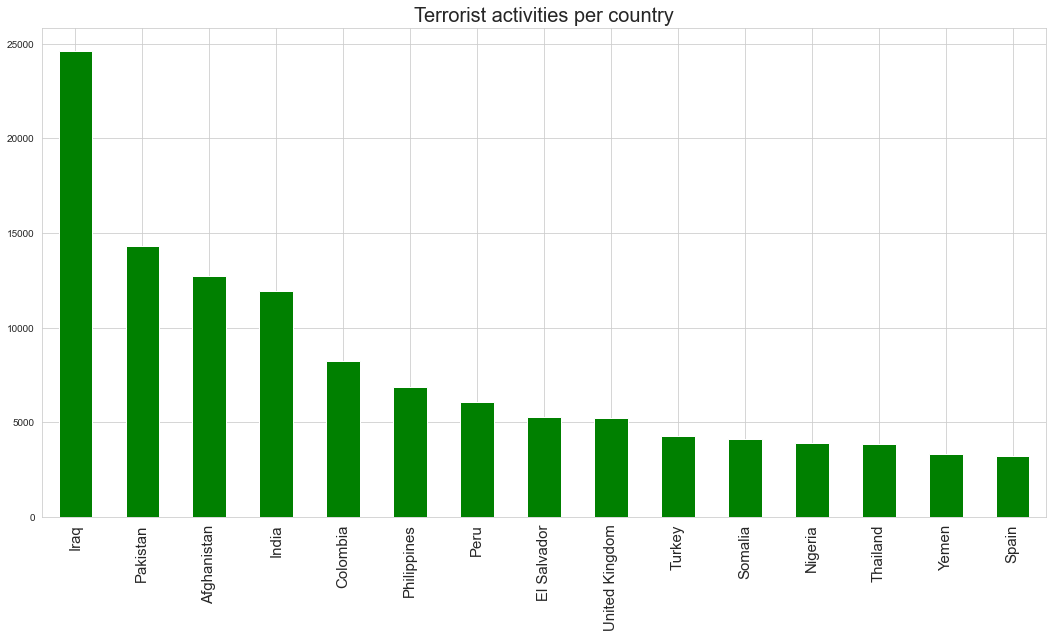

In [15]:
# Terrorist activities top 15 countries
top_15_country = df.country.value_counts()[:15]
top_15_country.plot(kind='bar', figsize=(18,9), color='green')
plt.xticks(size=15)
plt.title('Terrorist activities per country', size=20)
plt.show()

Iraq had the most terrorist attacks till now followed by Pakistan.

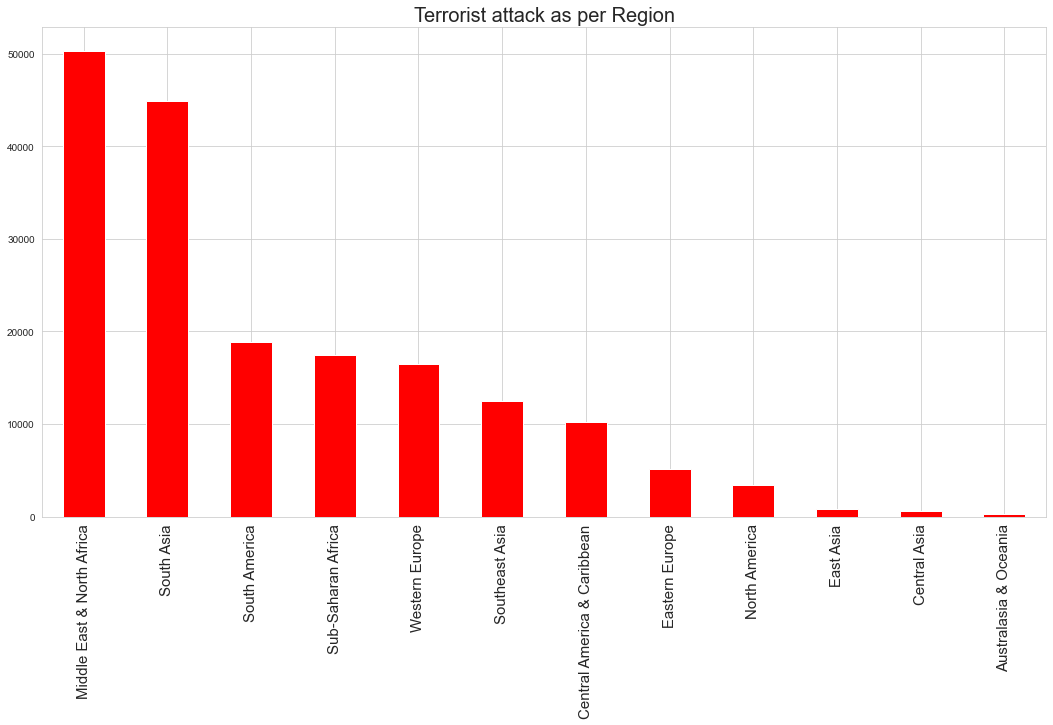

In [16]:
df.region.value_counts().plot(kind='bar', figsize=(18,9), color='red')
plt.xticks(rotation=90, size=15)
plt.title('Terrorist attack as per Region', size=20)
plt.show()

Most terrorist attacks takes place in Middle East & North Africa Region followed by South Asia.

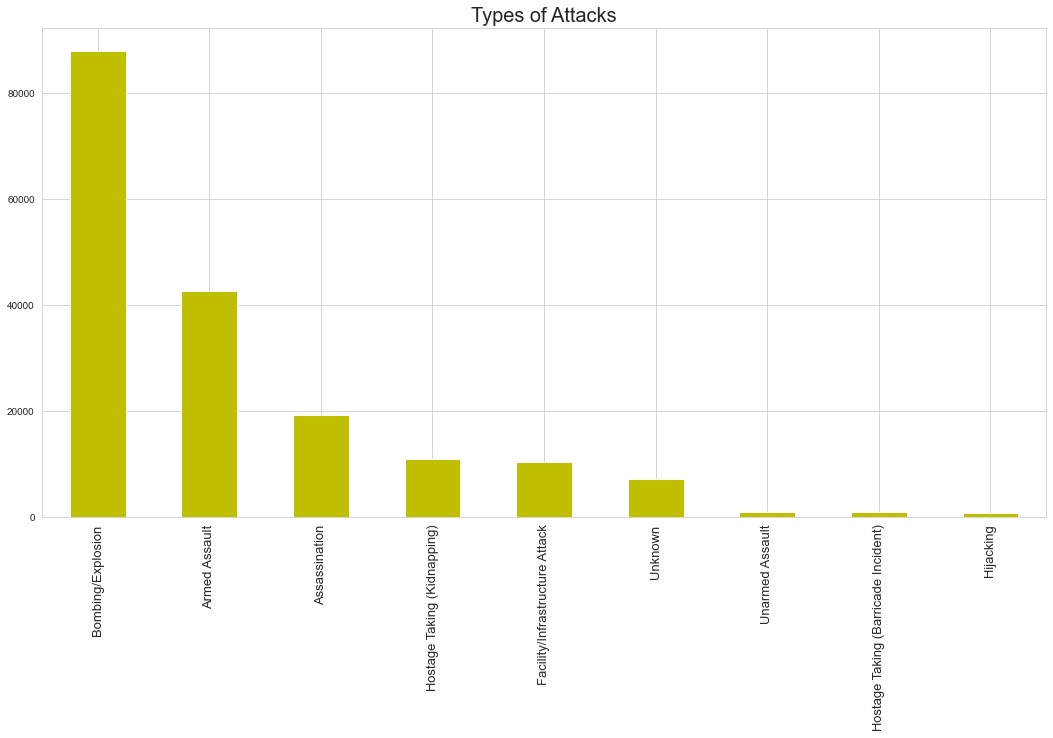

In [17]:
df.attack_type.value_counts().plot(kind='bar', figsize=(18,9), color='y')
plt.xticks(size=13)
plt.title('Types of Attacks', size=20)
plt.show()

Looks like more than 80000 attacks are carried out by Bombing/Explosion, followed by Armed Assault.

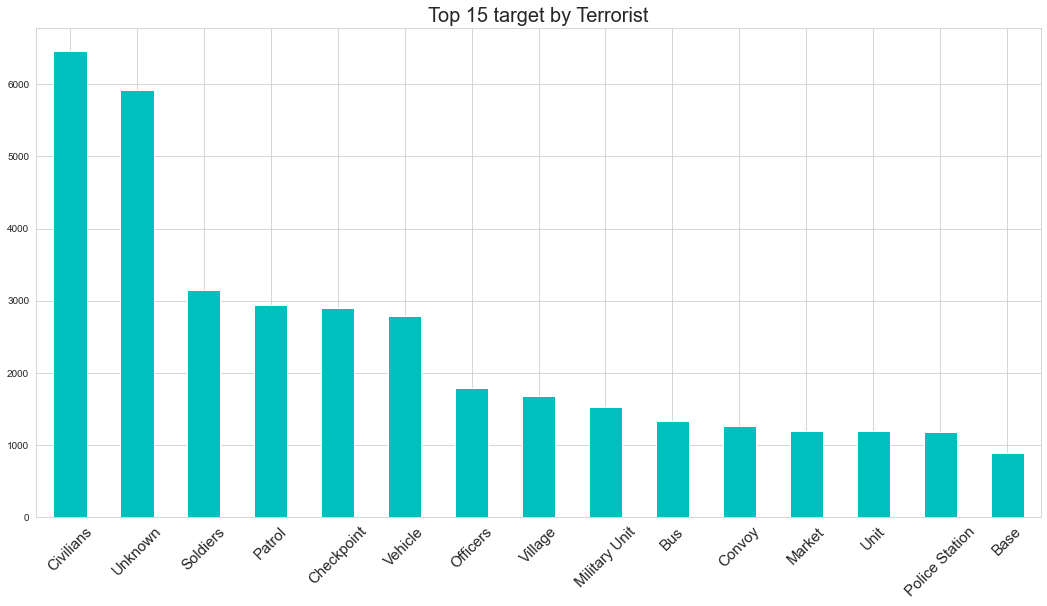

In [18]:
df.target.value_counts()[:15].plot(kind='bar', figsize=(18,9), color='c')
plt.xticks(rotation=45, size=15)
plt.title("Top 15 target by Terrorist", size=20)
plt.show()

This proves that the victims of terrorist violence are most often innocent civilians.

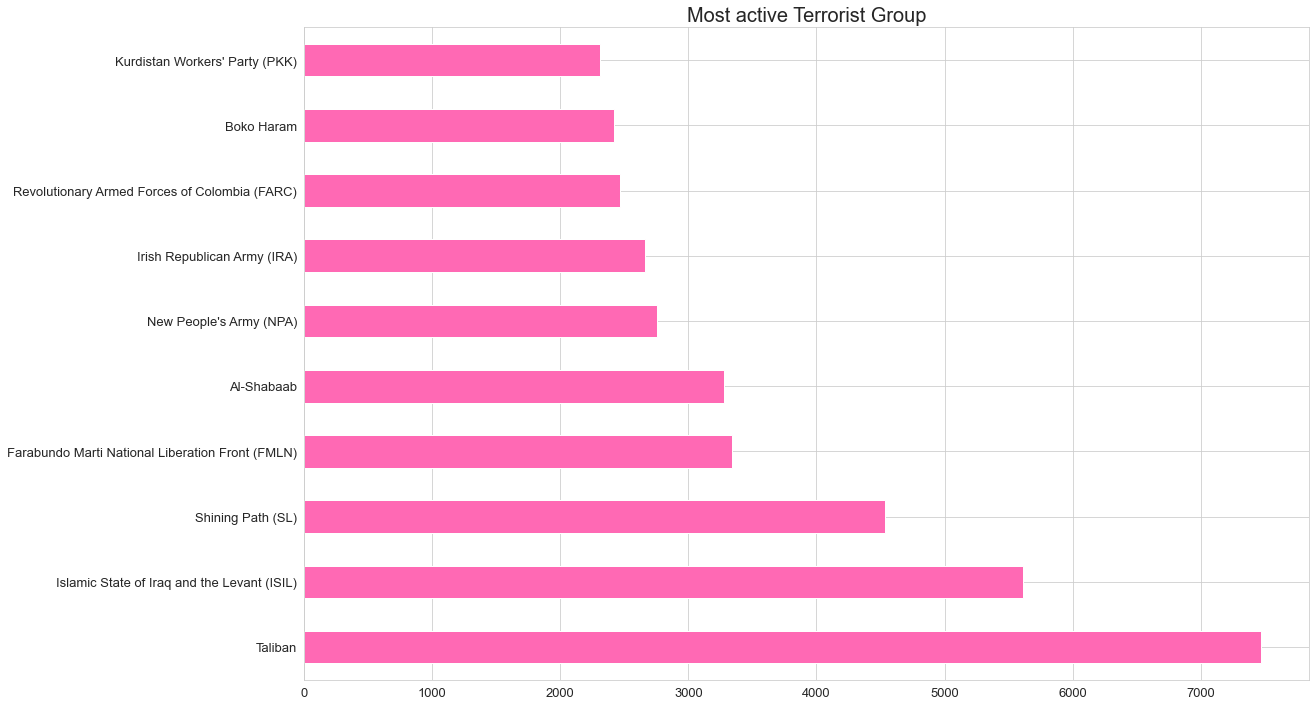

In [19]:
df.group_name.value_counts()[1:11].plot(kind='barh', figsize=(18,12), color='hotpink')
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Most active Terrorist Group", size=20)
plt.show()

Most active terrorist group is Taliban followed by ISIL

### Bivariate Analysis

In [20]:
groupby_attack = df.groupby('attack_type')[['killed', 'wounded']].sum()
groupby_attack

,killed,wounded
attack_type,,
Armed Assault,159640,77168
Assassination,24776,13849
Bombing/Explosion,157235,372226
Facility/Infrastructure Attack,3640,3764
Hijacking,3715,17001
Hostage Taking (Barricade Incident),4478,3966
Hostage Taking (Kidnapping),24129,6438
Unarmed Assault,879,13999
Unknown,32165,14683


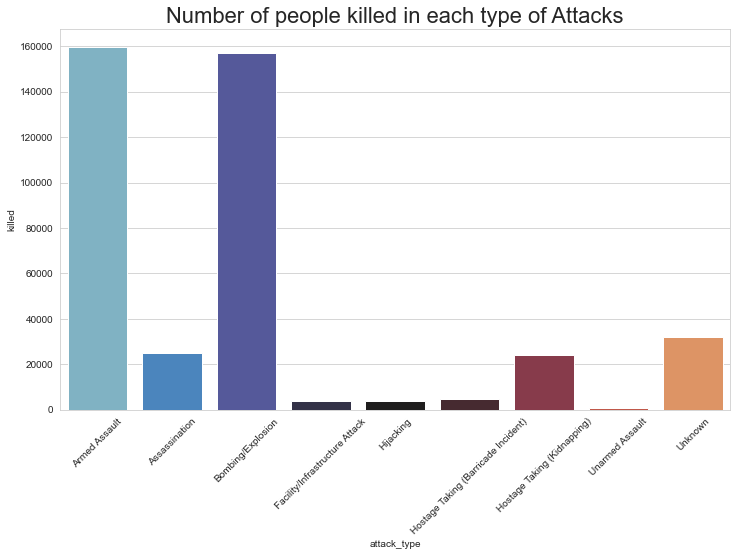

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(x=groupby_attack.index, y='killed', data=groupby_attack, palette='icefire')
plt.xticks(rotation=45)
plt.title("Number of people killed in each type of Attacks", size=22)
plt.show()

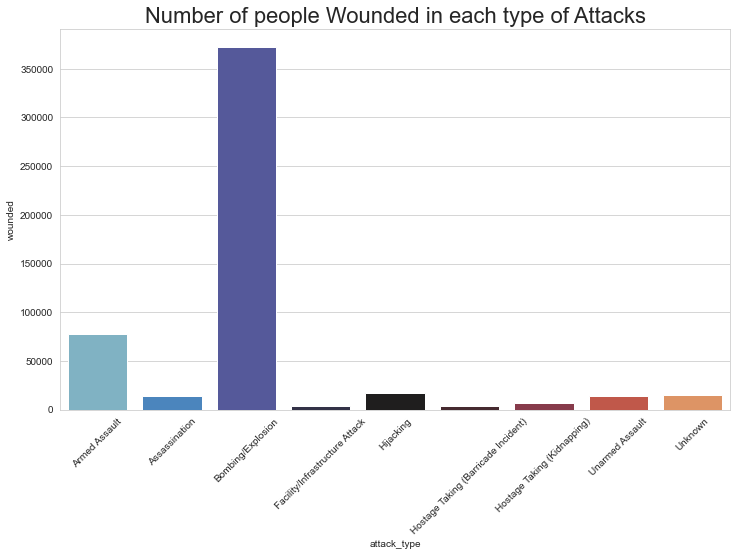

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(x=groupby_attack.index, y='wounded', data=groupby_attack, palette='icefire')
plt.xticks(rotation=45)
plt.title("Number of people Wounded in each type of Attacks", size=22)
plt.show()

Looks like more people killed in armed assault and bombing. And even more people are wounded in an Explosion.

In [23]:
cas_per_region = df.groupby('region', as_index=False)['casualities'].sum()
cas_per_region.head()

,region,casualities
0,Australasia & Oceania,401
1,Central America & Caribbean,37573
2,Central Asia,3007
3,East Asia,10361
4,Eastern Europe,19455


In [24]:
count_region = df.groupby('region')[['region']].count()
count_region.rename(columns={'region':'counts'}, inplace=True)
count_region.reset_index(inplace=True)
count_region

,region,counts
0,Australasia & Oceania,277
1,Central America & Caribbean,10260
2,Central Asia,562
3,East Asia,790
4,Eastern Europe,5136
5,Middle East & North Africa,50317
6,North America,3416
7,South America,18838
8,South Asia,44866
9,Southeast Asia,12438


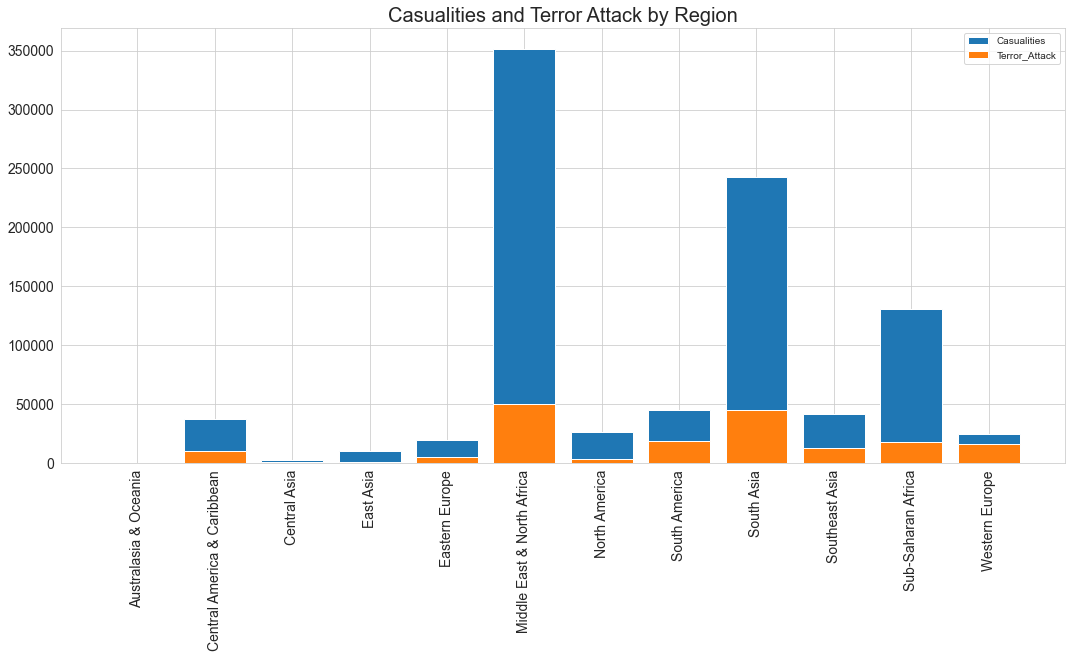

In [25]:
plt.figure(figsize=(18,8))
plt.bar(x='region', height='casualities', data=cas_per_region, label='Casualities')
plt.bar(x='region', height='counts', data=count_region, label='Terror_Attack')
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.title('Casualities and Terror Attack by Region', size=20)
plt.legend()
plt.show()

In [26]:
cas_per_year = df.groupby('year', as_index=False)[['casualities', 'killed']].sum()
cas_per_year.head()

,year,casualities,killed
0,1970,382,171
1,1971,240,168
2,1972,974,566
3,1973,865,370
4,1974,1403,538


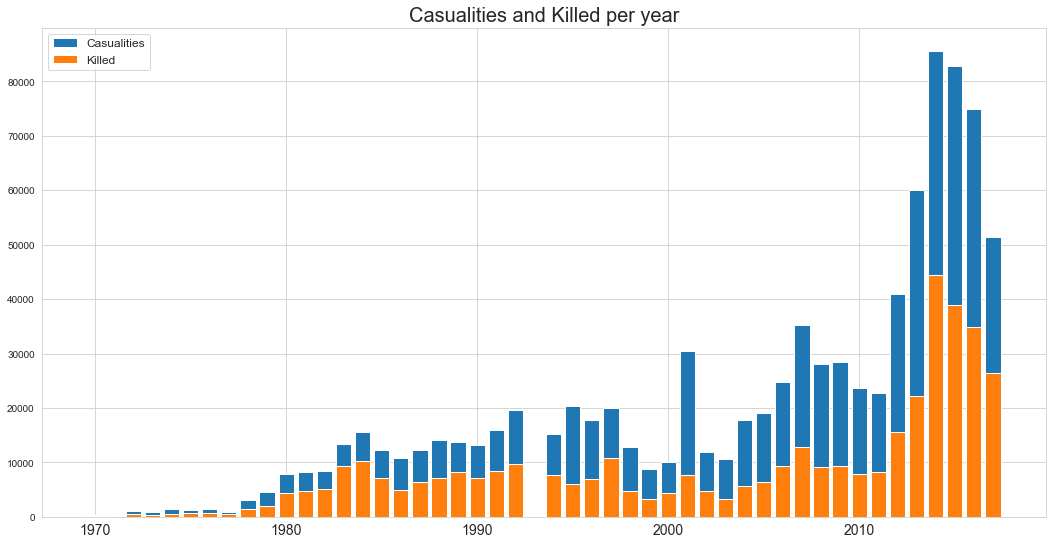

In [27]:
plt.figure(figsize=(18,9))
plt.bar('year', 'casualities', data=cas_per_year, label='Casualities')
# plt.plot('year' 'casualities', data=cas_per_year, color='g', ls='--')
plt.bar('year', 'killed', data=cas_per_year, label='Killed')
plt.xticks(size=14)
plt.title('Casualities and Killed per year', size=20)
plt.legend(fontsize='large')
plt.show()

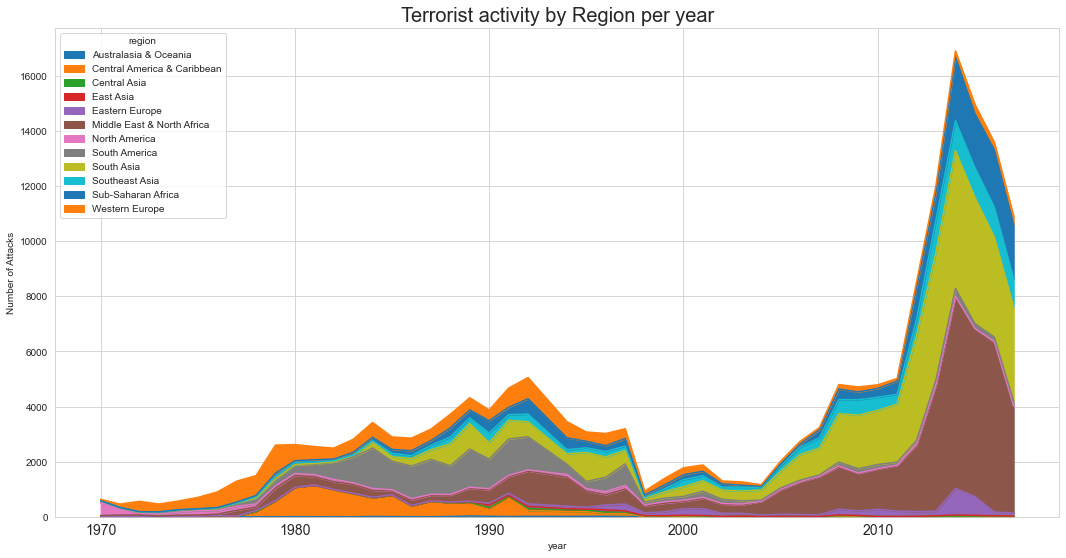

In [28]:
pd.crosstab(df.year, df.region).plot(kind='area', figsize=(18,9))
plt.title('Terrorist activity by Region per year', size=20)
plt.xticks(size=14)
plt.ylabel('Number of Attacks')
plt.show()

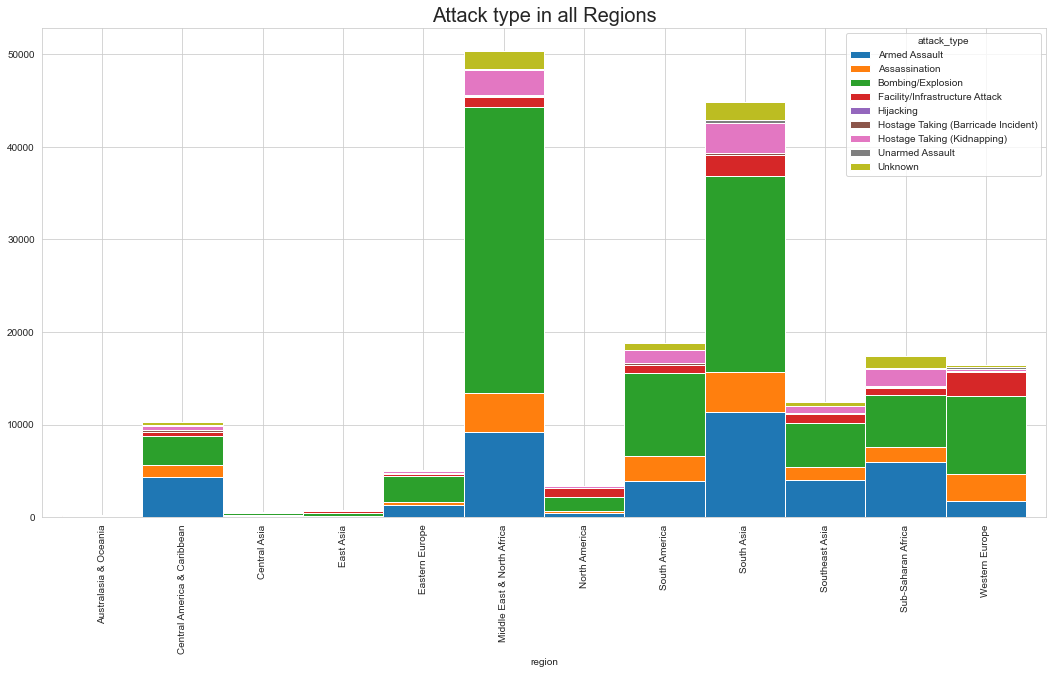

In [29]:
pd.crosstab(df.region, df.attack_type).plot(kind='bar', figsize=(18,9), stacked=True, width=1)
plt.title('Attack type in all Regions', size=20)
plt.show()

Bombings/Explosion are the most prominent types of Attack in all Regions.

In [56]:
cay = df.sort_values(by='casualities', ascending=False)[:20].pivot_table(index='country', columns='year', values='casualities').fillna(0)
cay

year,1982,1984,1992,1994,1995,1996,1998,2001,2004,2006,2007,2008,2014,2016,2017
country,,,,,,,,,,,,,,,
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1261.5,1503.0,0.0
Japan,0.0,0.0,0.0,0.0,5513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1071.0,0.0,0.0,0.0,0.0,0.0,0.0
Rwanda,0.0,0.0,0.0,1180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Somalia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,904.0


In [57]:
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=cay.values, x=cay.columns, y=cay.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(title='Worst Terror Attacks in History', 
                  xaxis=dict(ticks='', nticks=20), 
                  yaxis=dict(ticks=''))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)